# Collaborative Filtering

/*TODO: introduction na parang the type of filtering that we are going to be doing is item-item collaborative filtering. This means that we are focusing on the similarity between the items chuchu.*/

## Import

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

## Dataset Representation

In [5]:
book_df = pd.read_csv('Dataset3.csv', index_col=0)
book_df

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,1.0,5.0,4.0,NaN,1.0,3.0,4.0,1.0,5.0,NaN,...,3.0,5.0,NaN,2.0,NaN,1.0,4.0,5.0,3.0,4.0
1,NaN,NaN,5.0,3.0,4.0,1.0,4.0,NaN,NaN,1.0,...,5.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0
2,2.0,4.0,1.0,NaN,NaN,4.0,3.0,NaN,4.0,4.0,...,3.0,2.0,4.0,NaN,3.0,2.0,4.0,5.0,1.0,4.0
3,3.0,5.0,1.0,5.0,1.0,3.0,5.0,3.0,2.0,4.0,...,1.0,2.0,2.0,2.0,5.0,4.0,NaN,NaN,3.0,NaN
4,NaN,NaN,5.0,3.0,2.0,1.0,4.0,NaN,4.0,1.0,...,3.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,NaN,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.0,5.0,5.0,2.0,NaN,NaN,3.0,2.0,4.0,5.0,...,4.0,1.0,NaN,5.0,NaN,2.0,5.0,4.0,3.0,4.0
96,3.0,4.0,NaN,3.0,NaN,3.0,NaN,1.0,3.0,2.0,...,4.0,3.0,1.0,4.0,5.0,5.0,3.0,2.0,4.0,NaN
97,2.0,2.0,2.0,NaN,4.0,1.0,1.0,4.0,5.0,3.0,...,4.0,4.0,5.0,2.0,5.0,4.0,2.0,NaN,4.0,4.0
98,1.0,5.0,NaN,NaN,1.0,5.0,5.0,4.0,4.0,NaN,...,3.0,2.0,5.0,4.0,NaN,3.0,3.0,5.0,3.0,2.0


In [6]:
col_names = []
row_names = []

for i in range(100):
    row_names.append("Book " + str(i))

for i in range(300):
    col_names.append("User " + str(i))
    
book_df.index = row_names
book_df.columns = col_names

book_df

,User 0,User 1,User 2,User 3,User 4,User 5,User 6,User 7,User 8,User 9,...,User 290,User 291,User 292,User 293,User 294,User 295,User 296,User 297,User 298,User 299
Book 0,1.0,5.0,4.0,NaN,1.0,3.0,4.0,1.0,5.0,NaN,...,3.0,5.0,NaN,2.0,NaN,1.0,4.0,5.0,3.0,4.0
Book 1,NaN,NaN,5.0,3.0,4.0,1.0,4.0,NaN,NaN,1.0,...,5.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0
Book 2,2.0,4.0,1.0,NaN,NaN,4.0,3.0,NaN,4.0,4.0,...,3.0,2.0,4.0,NaN,3.0,2.0,4.0,5.0,1.0,4.0
Book 3,3.0,5.0,1.0,5.0,1.0,3.0,5.0,3.0,2.0,4.0,...,1.0,2.0,2.0,2.0,5.0,4.0,NaN,NaN,3.0,NaN
Book 4,NaN,NaN,5.0,3.0,2.0,1.0,4.0,NaN,4.0,1.0,...,3.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,NaN,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Book 95,1.0,5.0,5.0,2.0,NaN,NaN,3.0,2.0,4.0,5.0,...,4.0,1.0,NaN,5.0,NaN,2.0,5.0,4.0,3.0,4.0
Book 96,3.0,4.0,NaN,3.0,NaN,3.0,NaN,1.0,3.0,2.0,...,4.0,3.0,1.0,4.0,5.0,5.0,3.0,2.0,4.0,NaN
Book 97,2.0,2.0,2.0,NaN,4.0,1.0,1.0,4.0,5.0,3.0,...,4.0,4.0,5.0,2.0,5.0,4.0,2.0,NaN,4.0,4.0
Book 98,1.0,5.0,NaN,NaN,1.0,5.0,5.0,4.0,4.0,NaN,...,3.0,2.0,5.0,4.0,NaN,3.0,3.0,5.0,3.0,2.0


## Exploratory Data Analysis

### What book has the highest average rating?

In [7]:
mean = book_df.mean(axis=1)
mean.sort_values(ascending=False)

Book 41    3.217213
Book 51    3.160000
Book 27    3.157895
Book 53    3.155378
Book 79    3.142857
             ...   
Book 23    2.836653
Book 38    2.836576
Book 88    2.834677
Book 4     2.820408
Book 1     2.786008
Length: 100, dtype: float64

<AxesSubplot:>

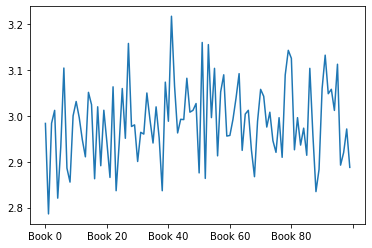

In [8]:
mean.plot.line()

#### 

## Data Mining
In this section, we would be finding the top five books that are most similar to `Book 0`. In order to do this, we would be import `CollaborativeFiltering` class. 

In this class, we have created different functions that would handle the different steps in answering this question: (1) computing for the mean of each book, (2) normalizing the values of each book based on its row mean, (3) getting the cosine similarity of each book to `Book 0`, and (4) determining which are the top five books based on the computed cosine similarity.

In [9]:
from collaborative_filtering import CollaborativeFiltering

After importing this class, we have instantiate a CollaborativeFiltering object with the parameter `5`. This parameter refers to the number of similar books that we want to find from our list of books. 

In [10]:
cfilter = CollaborativeFiltering(5)

Now that we have imported and instantiated the CollaborativeFiltering class, we can start using the class.

### Step 1: Calculating for the Row mean

In [11]:
mean = cfilter.get_row_mean(book_df)
mean

Book 0     2.983402
Book 1     2.786008
Book 2     2.983806
Book 3     3.011905
Book 4     2.820408
             ...   
Book 95    3.112500
Book 96    2.892430
Book 97    2.919831
Book 98    2.971311
Book 99    2.887550
Length: 100, dtype: float64

### Step 2: Normalizing the data
Since users might have a different way of rating each book (e.g. User 0 might give 0 for books that are uninteresting to her, but User 1 might give a 3 for the same reason), we have to normalize the data. Normalizing the data is done by subtracting the rating given by a user to a book by the mean of the ratings of that book.



In [12]:
normalized_df = cfilter.normalize_data(book_df, mean)
normalized_df.round(2)

,User 0,User 1,User 2,User 3,User 4,User 5,User 6,User 7,User 8,User 9,...,User 290,User 291,User 292,User 293,User 294,User 295,User 296,User 297,User 298,User 299
Book 0,-1.98,2.02,1.02,NaN,-1.98,0.02,1.02,-1.98,2.02,NaN,...,0.02,2.02,NaN,-0.98,NaN,-1.98,1.02,2.02,0.02,1.02
Book 1,NaN,NaN,2.21,0.21,1.21,-1.79,1.21,NaN,NaN,-1.79,...,2.21,1.21,-0.79,-1.79,-1.79,-1.79,-0.79,0.21,2.21,1.21
Book 2,-0.98,1.02,-1.98,NaN,NaN,1.02,0.02,NaN,1.02,1.02,...,0.02,-0.98,1.02,NaN,0.02,-0.98,1.02,2.02,-1.98,1.02
Book 3,-0.01,1.99,-2.01,1.99,-2.01,-0.01,1.99,-0.01,-1.01,0.99,...,-2.01,-1.01,-1.01,-1.01,1.99,0.99,NaN,NaN,-0.01,NaN
Book 4,NaN,NaN,2.18,0.18,-0.82,-1.82,1.18,NaN,1.18,-1.82,...,0.18,-1.82,-1.82,-0.82,-0.82,-0.82,-1.82,-0.82,NaN,2.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Book 95,-2.11,1.89,1.89,-1.11,NaN,NaN,-0.11,-1.11,0.89,1.89,...,0.89,-2.11,NaN,1.89,NaN,-1.11,1.89,0.89,-0.11,0.89
Book 96,0.11,1.11,NaN,0.11,NaN,0.11,NaN,-1.89,0.11,-0.89,...,1.11,0.11,-1.89,1.11,2.11,2.11,0.11,-0.89,1.11,NaN
Book 97,-0.92,-0.92,-0.92,NaN,1.08,-1.92,-1.92,1.08,2.08,0.08,...,1.08,1.08,2.08,-0.92,2.08,1.08,-0.92,NaN,1.08,1.08
Book 98,-1.97,2.03,NaN,NaN,-1.97,2.03,2.03,1.03,1.03,NaN,...,0.03,-0.97,2.03,1.03,NaN,0.03,0.03,2.03,0.03,-0.97


### Step 3: Computing for the Cosine Similarity of the other books to `Book 0`

In [25]:
for i in range(1, 100):
    sim = cfilter.get_cosine_similarity(normalized_df.iloc[0, :], normalized_df.iloc[i, :])
    print('Cosine similarity of Book 0 and Book', str(i).rjust(2),  ':', '{:.2f}'.format(sim).rjust(5), '\n')

Cosine similarity of Book 0 and Book  1 :  0.03 

Cosine similarity of Book 0 and Book  2 : -0.01 

Cosine similarity of Book 0 and Book  3 : -0.03 

Cosine similarity of Book 0 and Book  4 : -0.02 

Cosine similarity of Book 0 and Book  5 : -0.00 

Cosine similarity of Book 0 and Book  6 :  0.08 

Cosine similarity of Book 0 and Book  7 : -0.04 

Cosine similarity of Book 0 and Book  8 :  0.04 

Cosine similarity of Book 0 and Book  9 :  0.05 

Cosine similarity of Book 0 and Book 10 :  0.06 

Cosine similarity of Book 0 and Book 11 : -0.02 

Cosine similarity of Book 0 and Book 12 :  0.06 

Cosine similarity of Book 0 and Book 13 : -0.08 

Cosine similarity of Book 0 and Book 14 :  0.10 

Cosine similarity of Book 0 and Book 15 : -0.05 

Cosine similarity of Book 0 and Book 16 : -0.03 

Cosine similarity of Book 0 and Book 17 : -0.01 

Cosine similarity of Book 0 and Book 18 :  0.01 

Cosine similarity of Book 0 and Book 19 : -0.05 

Cosine similarity of Book 0 and Book 20 :  0.05 



### Step 4: Determining the top 5 similar books to `Book 0`

Althouogh, it is important to note that the `get_k_similar` function inside the `CollaborativeFiltering` class also calls the functions indicated in the previous steps. This means that we can directly call the `get_k_similar` function after instantiating the class. However, the step-by-step procedure was still shown in order to explain the process in getting the top 5 similar items to `Book 0`.

In [14]:
book0 = book_df.iloc[0, :]
other_books = book_df.iloc[1:, :]
similar_books = cfilter.get_k_similar(other_books, book0)
print(similar_books[1].round(2))

Book 38    0.15
Book 53    0.13
Book 76    0.12
Book 65    0.12
Book 14    0.10
dtype: float64


## Insights and Conclusions

## References
https://www.geeksforgeeks.org/python-change-column-names-and-row-indexes-in-pandas-dataframe/